## World Happiness Report


### The world Happines Report is a publication of United Nations Sustainable Developement solutions Network. The world happiness report is the survey of  global happiness. The first report of world happiness is published in 2012 and now in 2022 it's completed 10 years. The world happiness day is celebrating on 20th March. The happiness score of country is depend on various factors of that country, like government, economy, corruption, citizens of country and their life style. 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("world happiness")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### About the Columns

    1.Country 
        It shows the countries name from different region.
    
    2.Region
        There are seven regions and it shows which country is from which region.
        
    3.Happiness Rank
        It shows the rank of the countries based on their happiness.
        
    4.Happiness Score
        This column shows the happiness score of the countries.
        
    5.Standard error
        Standard error is statistical term which represents the population.
        
    6.Economy (GDP per Capita)
        The economy column shows that the economical condition of a country.
        
    7.Family
    8.Health (Life Expectancy)
        This column shows the Health of people in country.
        
    9.Freedom
        It shows the freedom of people.
        
    10.Trust (Government Corruption)
        It shows the how much the country is corrupted.
        
    11.Generosity
        this column shows the generousness of people.
        
    12.Dystopia Residual
        This is an imaginary country.
        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

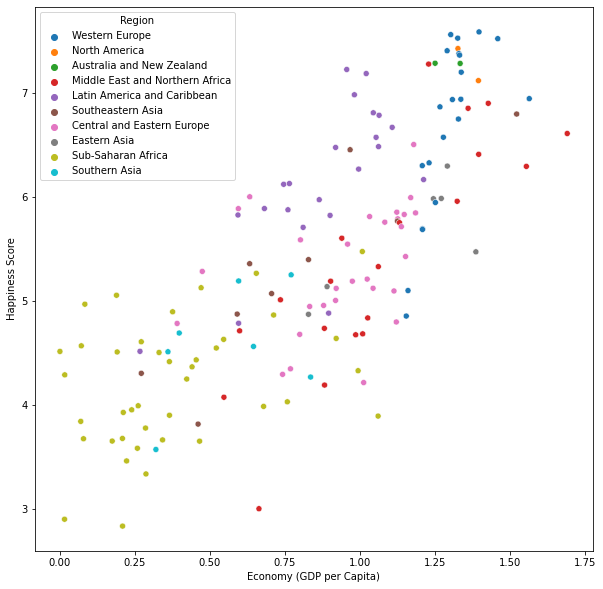

In [7]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',hue=df['Region'],data=df)

From the above scatterplot it seen that as majority the Western Europe Region has the highest Economy(GDP per capita) so, the Western Europe has the highest Happiness Score.
Sub-Saharan Africa ha the lowest economy(GDP per capita) so, it has lowest Happiness Score.


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

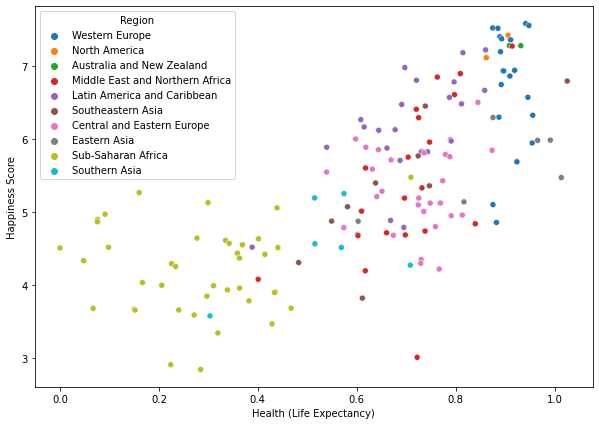

In [8]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',hue=df['Region'],data=df)

Above scatter plot tells that as the majority western europe has a most healthy life so,the western europe has the highest happiness score and Sub-Saharan Africa has the lowest healthy life so, it has least happiness score.

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

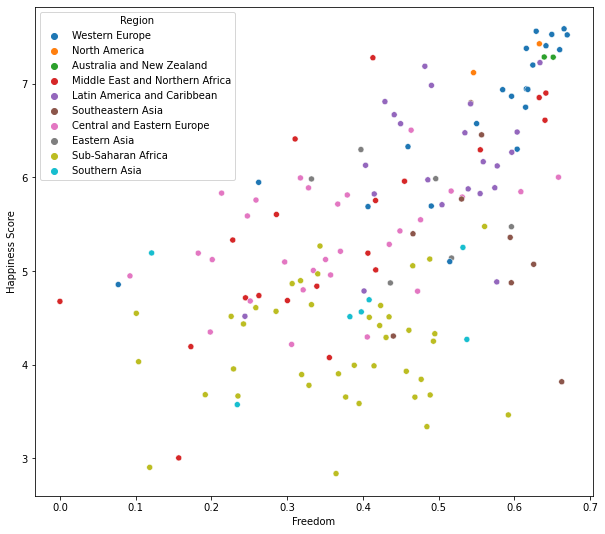

In [9]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Freedom',y='Happiness Score',hue=df['Region'],data=df)

As seen in the above scatter plot the Western Europe has the highest freedom score so it has highest happiness score. Middle East and Northern America has the lowest freedom score so, it has lowest happiness score.

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

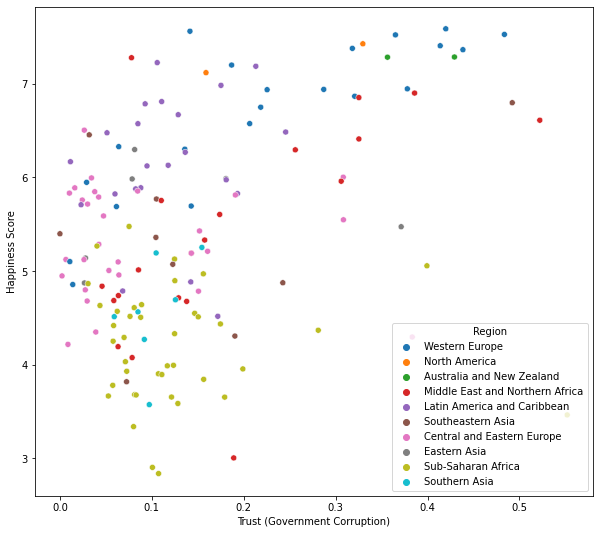

In [10]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',hue=df['Region'],data=df)

In above scatterplot we seen that the Western Europe has the highest Happiness Score

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

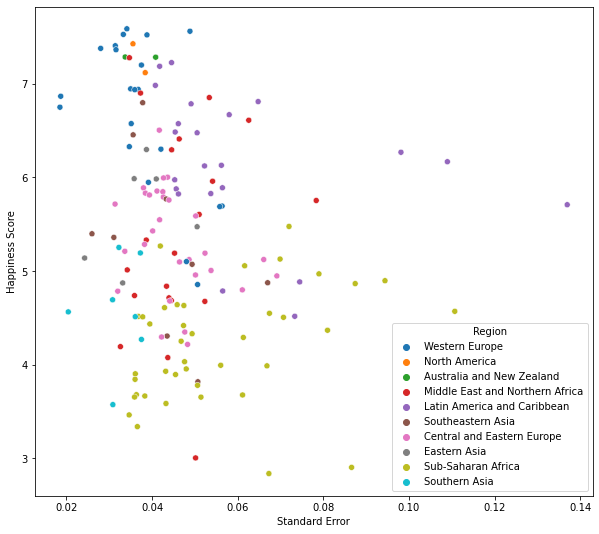

In [11]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Standard Error',y='Happiness Score',hue=df['Region'],data=df)

Above scatterplot shows that the Western Europe has the lowest standard error but highest Happiness Score

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

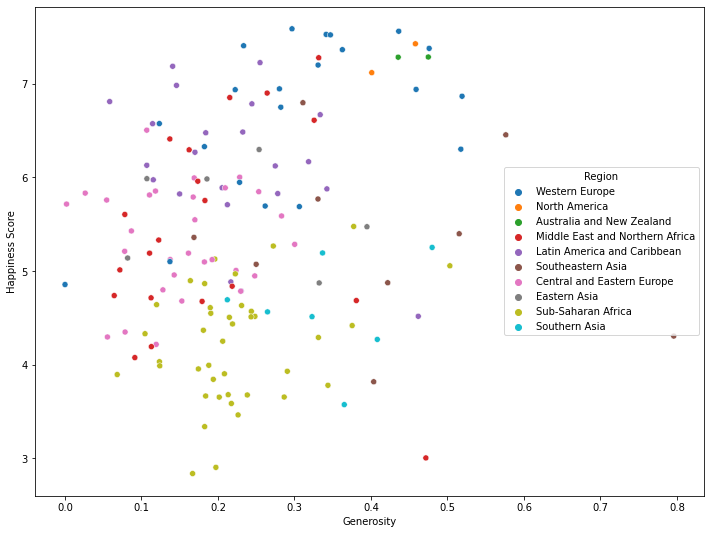

In [12]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Generosity',y='Happiness Score',hue=df['Region'],data=df)

Western Europe has the highest Happiness Score

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

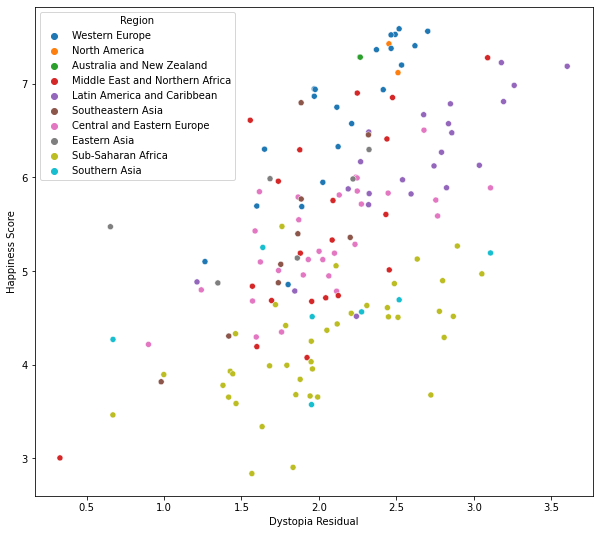

In [13]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',hue=df['Region'],data=df)

In [14]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


#### Corelation by using heatmap

<AxesSubplot:>

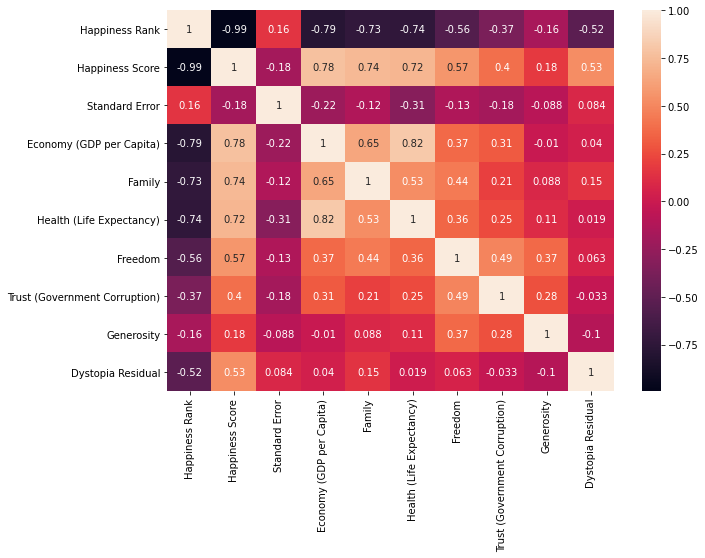

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Outcome of Corelation

All the columns of the dataset except standard error and happiness rank has the positive relation with Happiness Score. Standard error and Happiness rank have the negative relation with Happiess score.

Economy(GDP per capita) has 78 percent correlation with the target column which considered to be the strong bond. Family has the 74 percent and Health(Life Expectancy) has the 72 percent orrelation with the target column which considered to be the strong bond. Freedom has the 57 percent correlation with the target column which is also conidered as strong bond. Trust(Government Corruption ) ha the 4 percent correlation with the target column which is considered as the weak bond. Generosity has the 18 percent correlation with the target column which is a good bond. Dystopia Residual has a 53 percent correlation with the target column which considered to be strong bond.

Happiness rank and standard error has the negative correlation with the target column 99 and 18 percent resp.


### Describing Dataset

In [16]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


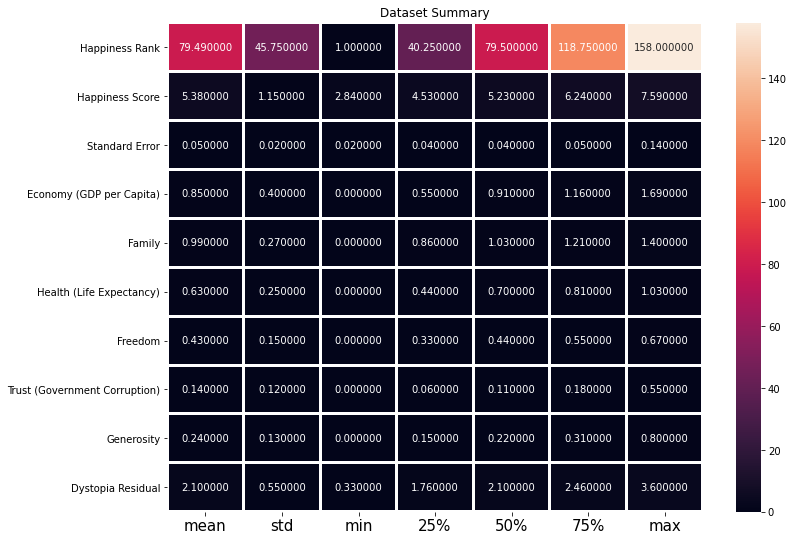

In [17]:
plt.figure(figsize=(12,9))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidths=2,annot=True,fmt="f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.title("Dataset Summary")
plt.show()

### Outcome of Describe Dataset

From the above plotting we are determining mean,standard deviation,minimum and maximum value of each column.It helps us further cleaning the data.

Happpiness Rank
    1.Mean = 79.49
    2.std = 45.75
    3.min_val = 1
    4.max_val = 158
    
Happiness Score
    1.Mean = 5.38
    2.std = 1.15
    3.min_val = 2.84
    4.max_val = 7.59
    
Standard Error
    1.Mean = 0.05
    2.std = 0.02
    3.min_val = 0.02
    4.max_val = 0.14
    
Economy(GDP per capita)
    1.Mean = 0.85
    2.std = 0.40
    3.min_val = 0
    4.max_val = 1.69
    
Family
    1.Mean = 0.99
    2.std = 0.27
    3.min_val = 0
    4.max_val = 1.40
    
Health(Life Expectancy)
    1.Mean = 0.63
    2.std = 0.25
    3.min_val = 0
    4.max_val = 1.03
    
Freedom
    1.Mean = 0.43
    2.std = 0.15
    3.min_val = 0
    4.max_val = 0.67
    
Trust(Government corruption)
    1.Mean = 0.14 
    2.std = 0.12
    3.min_val = 0
    4.max_val = 0.55
    
Generosity
    1.Mean = 0.24
    2.std = 0.13
    3.min_val = 0
    4.max_val = 0.80
    
Dystopia Residual
    1.Mean = 2.1
    2.std = 0.55
    3.min_val = 0.33
    4.max_val = 3.6

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Checking Outliers

<AxesSubplot:xlabel='Happiness Rank'>

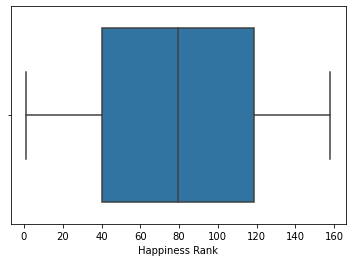

In [19]:
sns.boxplot(df['Happiness Rank'])

As shown in above boxplot Happiness Rank has no outliers.

<AxesSubplot:xlabel='Happiness Score'>

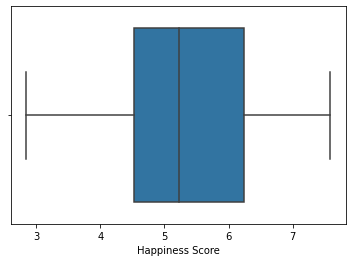

In [20]:
sns.boxplot(df['Happiness Score'])

Happines Score has no outliers.

<AxesSubplot:xlabel='Standard Error'>

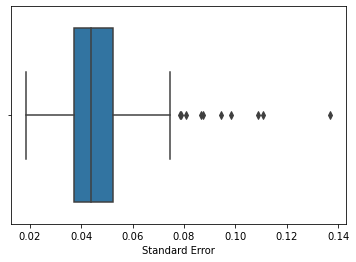

In [21]:
sns.boxplot(df['Standard Error'])

Above boxplot shows that the Standard Error has much outliers.

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

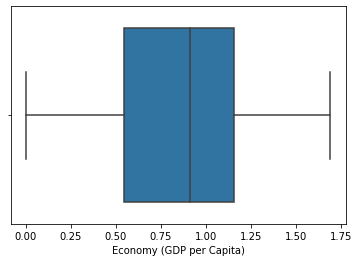

In [22]:
sns.boxplot(df['Economy (GDP per Capita)'])

There is no outliers in Economy(GDP per Capita)

<AxesSubplot:xlabel='Family'>

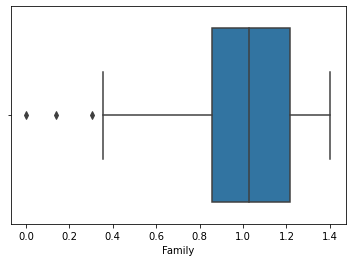

In [23]:
sns.boxplot(df['Family'])

Three outliers are present in Family.

<AxesSubplot:xlabel='Health (Life Expectancy)'>

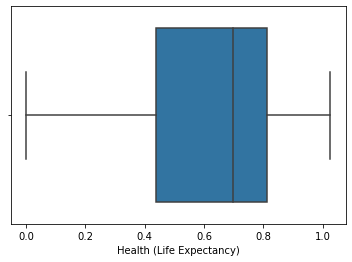

In [24]:
sns.boxplot(df['Health (Life Expectancy)'])

No outliers in Health(Life Expectancy)

<AxesSubplot:xlabel='Freedom'>

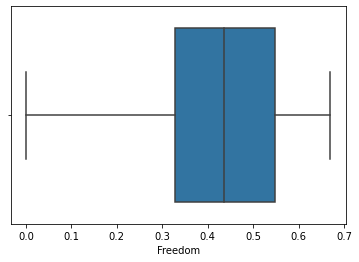

In [25]:
sns.boxplot(df['Freedom'])

    Freedom column has no outliers

<AxesSubplot:xlabel='Trust (Government Corruption)'>

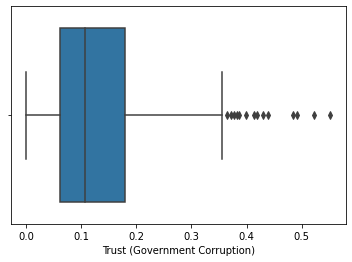

In [26]:
sns.boxplot(df['Trust (Government Corruption)'])

Trust(Government Corruption) has highest number of outliers.

<AxesSubplot:xlabel='Generosity'>

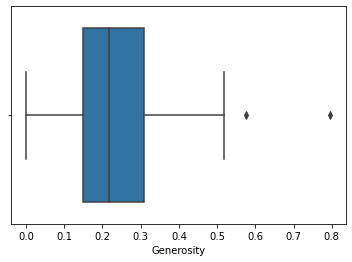

In [27]:
sns.boxplot(df['Generosity'])

Generosity has two outliers

<AxesSubplot:xlabel='Dystopia Residual'>

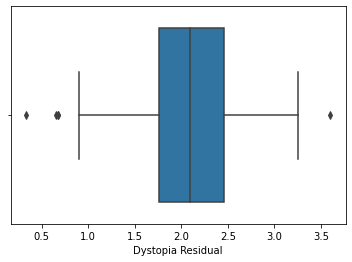

In [28]:
sns.boxplot(df['Dystopia Residual'])

Dystopia Residual has three outliers.

### Skewness

In [29]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness threshold taken is +/-0.5. 

<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

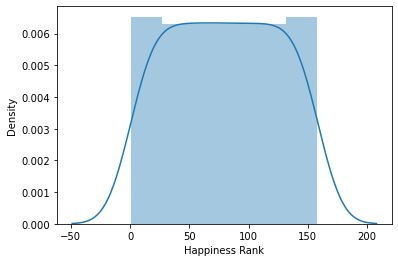

In [30]:
sns.distplot(df['Happiness Rank'])

The data is not normalised.

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

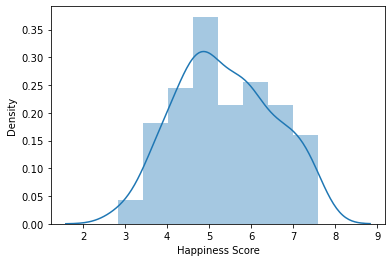

In [31]:
sns.distplot(df['Happiness Score'])

Data is not normalised.Building block is out of the normalised curve.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

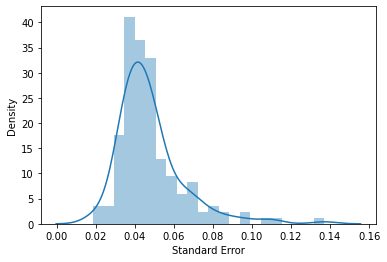

In [32]:
sns.distplot(df['Standard Error'])

The data is not normalised.Building block is out of the normalised curve.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

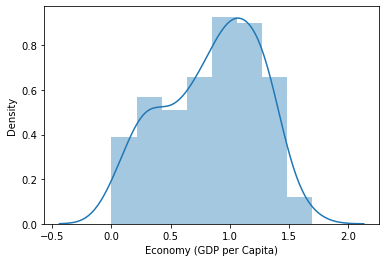

In [33]:
sns.distplot(df['Economy (GDP per Capita)'])

This data is not normalised.Building block is out of the normal curve.

<AxesSubplot:xlabel='Family', ylabel='Density'>

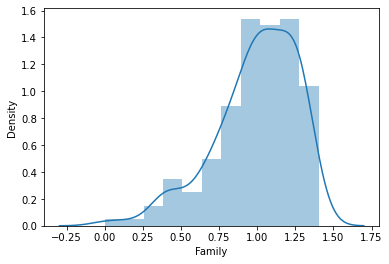

In [34]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

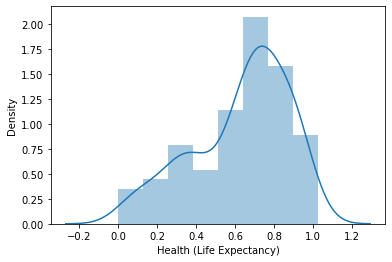

In [35]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

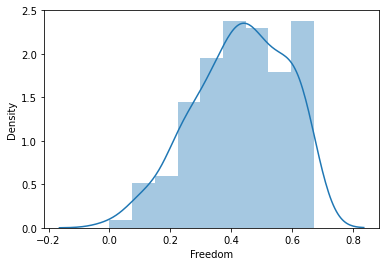

In [36]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

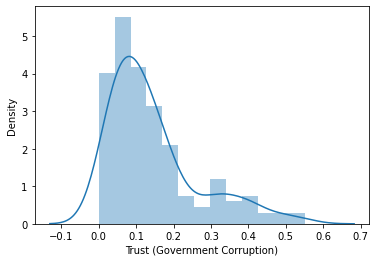

In [37]:
sns.distplot(df['Trust (Government Corruption)'])

Data is not normalised. The building block is out of the norma curve.

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

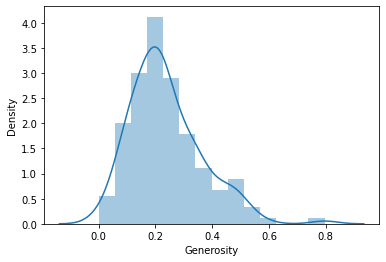

In [38]:
sns.distplot(df['Generosity'])

    The data is not normalised.Building block is out of the normal curve.

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

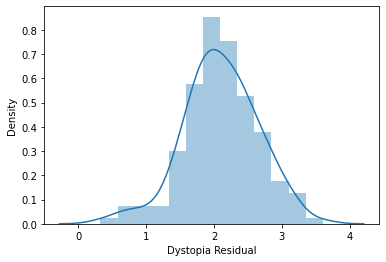

In [39]:
sns.distplot(df['Dystopia Residual'])

### Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])
df['Country'] = le.fit_transform(df['Country'])

In [41]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


By using Label encoding technique we converted the Catagorical data into Numerical.

### Removing Outlier

Z score technique

In [42]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print(z)

[[1.23877001 1.30025593 1.72099989 ... 2.30965159 0.47103971 0.75825809]
 [0.44946522 1.30025593 1.69907456 ... 0.01647953 1.57585637 1.09285682]
 [0.90989302 1.30025593 1.67714922 ... 2.8427738  0.8242928  0.71233526]
 ...
 [1.26069514 0.37544095 1.67742676 ... 0.38141902 1.85689094 3.20843049]
 [1.26069514 0.96511655 1.69935209 ... 0.35771452 0.31694987 0.48198451]
 [1.37032081 0.96511655 1.72127743 ... 0.30180313 0.5581534  0.96361241]]


In [43]:
Threshold = 3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


Since there are no outliers in categorical column.

In [44]:
df1 = df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(158, 12)
(149, 12)


### Percentage Data Loss

In [45]:
loss_percent = (158-149)/158*100
loss_percent

5.69620253164557

### Model with Outliers is df

In [46]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

### Transforming Data to Remove Skewness

In [47]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989335,
        -0.14727363, -0.17248608]])

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.75498234,
         1.81762514,  0.65957855],
       [-0.30048669,  1.23451354, -1.99584442, ...,  1.44218195,
         0.32967608,  1.56260401],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.6160368 ,
         1.95339957,  0.97722591],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -1.26539516,
        -0.19284339,  1.13425805],
       [-1.50728158,  0.95527966,  1.56626337, ...,  0.31812329,
        -0.4344978 , -0.31207994],
       [-1.24683102,  0.95527966,  1.60111233, ..., -1.84989335,
        -0.14727363, -0.17248608]])

### Model without outlier

In [53]:
x = df1.iloc[:,0:12]
x

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [55]:
x.drop(['Happiness Score'],axis=1)

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [57]:
y = df1.iloc[:,3]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [58]:
x.shape

(149, 12)

In [59]:
y.shape

(149,)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=45)

In [62]:
x_train.shape

(104, 12)

In [63]:
y_train.shape

(104,)

In [64]:
x_test.shape

(45, 12)

In [65]:
y_test.shape

(45,)

In [71]:
def train(model,x,y):
    model.fit(x,y)
    pred = model.predict(x)
    cv_score = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE',mean_squared_error(y,pred))
    print('CV',cv_score)

Model Report
MSE 1.2891787276598415e-30
CV 1.7231261032710368e-29


<AxesSubplot:title={'center':'Model Coefficients'}>

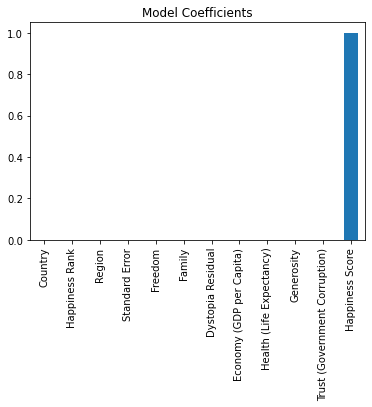

In [75]:
model = LinearRegression()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 0.05021520402062895
CV 0.13218133481340372


<AxesSubplot:title={'center':'Model Coefficients'}>

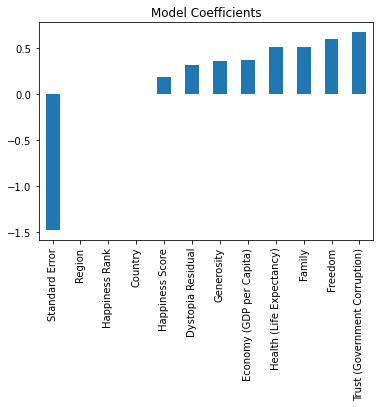

In [86]:
model = Ridge(normalize=True)
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 0.017804096565967226
CV 0.04603582598398654


<AxesSubplot:title={'center':'Model Coefficients'}>

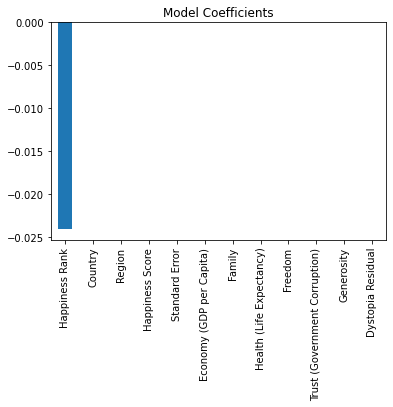

In [79]:
model = Lasso()
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind = 'bar',title = 'Model Coefficients')

Model Report
MSE 0.0
CV 0.2110388843678161


<AxesSubplot:title={'center':'Feature Importance'}>

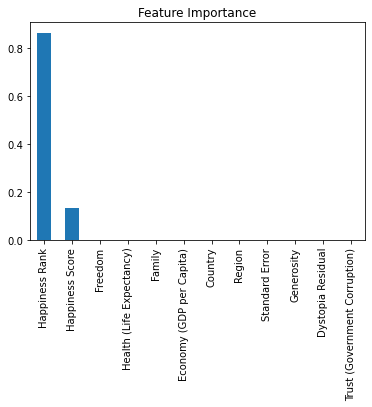

In [83]:
model = DecisionTreeRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 0.0005530731053691079
CV 0.2102168572549417


<AxesSubplot:title={'center':'Feature Importance'}>

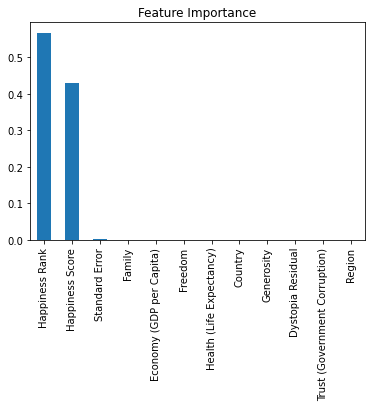

In [84]:
model = RandomForestRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = 'Feature Importance')

Model Report
MSE 5.580926186014088e-29
CV 0.17472041866622848


<AxesSubplot:title={'center':'Feature Importance'}>

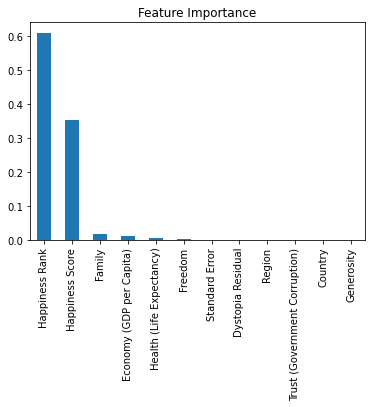

In [85]:
model = ExtraTreesRegressor()
train(model,x,y)
coef = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind = 'bar',title = 'Feature Importance')

In this case we used LinearRegression model for happiness score.